<a href="https://colab.research.google.com/github/EmGrGit/Python_training/blob/main/Matplotlib_plot_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Bar Charts

In [15]:
url = 'https://raw.githubusercontent.com/cloudacademy/data-visualization-with-python-using-matplotlib/master/data/fifa20_players_stats.csv'
df = pd.read_csv(url, index_col=0, usecols=[x for x in range(74)])
df.head()

,Name,Country,Position,Age,Overall,Potential,Club,ID,Height,Weight,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,Lionel Messi,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,158023,"5'7""",159lbs,...,4,Medium,Low,5,87,92,92,96,39,66
1,C. Ronaldo dos Santos Aveiro,Portugal,"ST,LW",34,93,93,Juventus,20801,"6'2""",183lbs,...,5,High,Low,5,90,93,82,89,35,78
2,Neymar da Silva Santos Jr.,Brazil,"LW,CAM",27,92,92,Paris Saint-Germain,190871,"5'9""",150lbs,...,5,High,Medium,5,91,85,87,95,32,58
3,Jan Oblak,Slovenia,GK,26,91,91,Atlético Madrid,200389,"6'2""",192lbs,...,1,Medium,Medium,3,87,92,78,89,52,90
4,Kevin De Bruyne,Belgium,"CAM,CM",28,91,91,Manchester City,192985,"5'11""",154lbs,...,4,High,High,4,76,86,92,86,61,78


In [17]:
df.shape

(18547, 73)

In [18]:
count_countries = df[
      ['Country', 'Name']
].groupby('Country').count().rename(
    columns={'Name':'Number of Players'}
)

In [27]:
count_countries_sorted = count_countries.sort_values(by='Number of Players', ascending=False)

In [29]:
top_10 = count_countries_sorted.head(10)

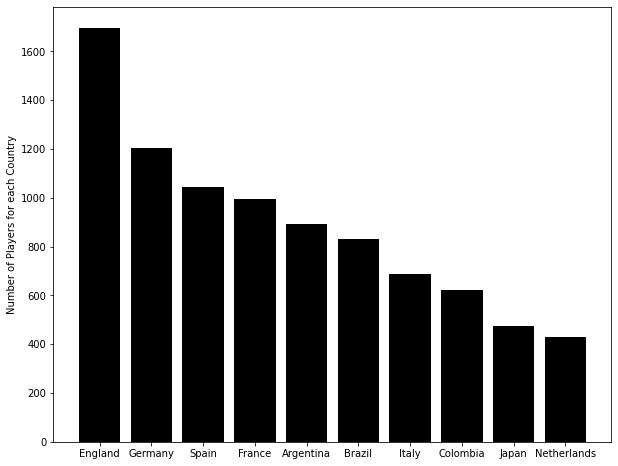

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(top_10.index,top_10['Number of Players'],color='black')
ax.set_ylabel('Number of Players for each Country')
plt.show()

In [34]:
top_50 = count_countries_sorted.head(50)

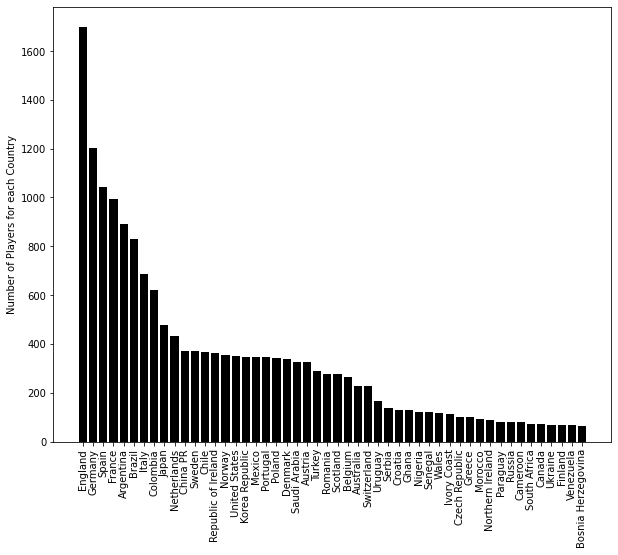

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(top_50.index,top_50['Number of Players'],color='black')
ax.set_ylabel('Number of Players for each Country')
ax.set_xticklabels(top_50.index, rotation=90)
plt.show()

Histograms

In [39]:
def normalised_data(df):
  normalised_df = (df['Overall']-df['Overall'].mean())/df['Overall'].std()
  normalised_df = normalised_df[-normalised_df.isna()].to_frame()
  return normalised_df

In [40]:
normalised_df = normalised_data(df)

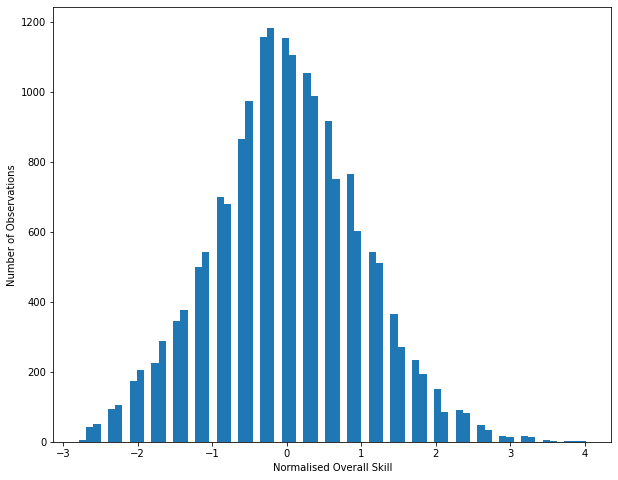

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(normalised_df['Overall'], label='Overall Skill', bins=70)
ax.set_xlabel('Normalised Overall Skill')
ax.set_ylabel('Number of Observations')
plt.show()

In [46]:
england = df.query("Country=='England'").reset_index(drop=True)
italy = df.query("Country=='Italy'").reset_index(drop=True)
spain = df.query("Country=='Spain'").reset_index(drop=True)

In [48]:
england_norm = normalised_data(england)
italy_norm = normalised_data(italy)
spain_norm = normalised_data(spain)

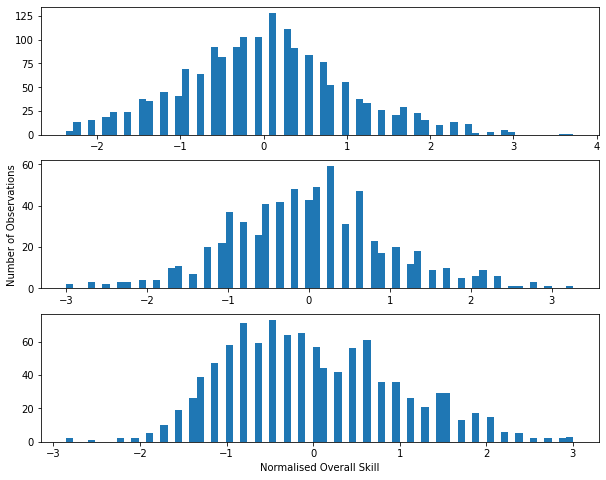

In [52]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
ax[0].hist(england_norm['Overall'], label='England', bins=70)
ax[1].hist(italy_norm['Overall'], label='Italy', bins=70)
ax[2].hist(spain_norm['Overall'], label='Spain', bins=70)
ax[2].set_xlabel('Normalised Overall Skill')
ax[1].set_ylabel('Number of Observations')
#ax.legend()
plt.show()

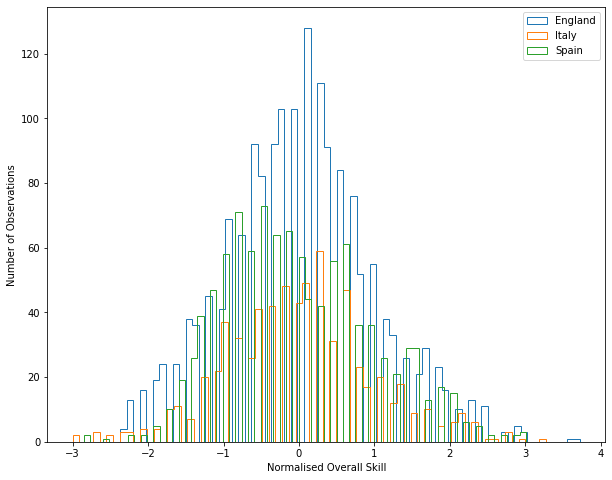

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax.hist(england_norm['Overall'], label='England', bins=70, histtype='step')
ax.hist(italy_norm['Overall'], label='Italy', bins=70, histtype='step')
ax.hist(spain_norm['Overall'], label='Spain', bins=70, histtype='step')
ax.set_xlabel('Normalised Overall Skill')
ax.set_ylabel('Number of Observations')
ax.legend()
plt.show()